In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import scipy
from tqdm.notebook import trange, tqdm


In [2]:
def create_weighted_directed_graph_from_adj_matrix(adjacency_matrix):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    num_nodes = adjacency_matrix.shape[0]
    for i in range(num_nodes):
        G.add_node(i)

    # Add edges from adjacency matrix
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = adjacency_matrix[i, j]
            if weight > 0:  # Add an edge only if weight is greater than 0
                G.add_edge(i, j, weight=weight)

    return G

# Test the function
num_nodes = 10

# Create a num_nodes by num_nodes matrix filled with zeros
adjacency_matrix = np.zeros((num_nodes, num_nodes))

# Fill in the adjacency matrix with random edge weights
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:  # No self-connections
            weight = random.randint(1, 10)
            adjacency_matrix[i, j] = weight

# add some random zeros to the adjacency matrix
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:  # No self-connections
            if random.randint(1, 2) == 1:
                adjacency_matrix[i, j] = 0

# triangular matrix
# adjacency_matrix = np.triu(adjacency_matrix)

print("Adjacency Matrix:")
print(adjacency_matrix)

G = create_weighted_directed_graph_from_adj_matrix(adjacency_matrix)

# Print the edges of the graph
# print("Edges of the Graph:")
# for edge in G.edges(data=True):
#     print(edge)


Adjacency Matrix:
[[ 0.  3.  3.  7.  5.  8.  7.  2.  7.  6.]
 [ 4.  0.  0.  6.  2.  6. 10.  0. 10.  5.]
 [ 0.  3.  0.  0.  0.  2.  0.  4.  0.  0.]
 [ 7.  0.  0.  0.  7.  0.  0. 10.  9.  0.]
 [ 3.  0.  0.  0.  0.  4.  7.  0.  0.  0.]
 [ 4.  2.  0.  2.  1.  0.  0.  2.  0.  0.]
 [ 0.  9.  0.  7.  0.  0.  0. 10. 10.  1.]
 [ 3.  0.  0.  8.  6.  9.  0.  0.  0.  0.]
 [ 6.  0.  0.  3.  4.  2.  0.  0.  0.  5.]
 [ 7.  3.  6.  2. 10.  1.  5.  0.  0.  0.]]


In [3]:
# save adjacency matrix
np.save('adjacency_matrix.npy', adjacency_matrix)

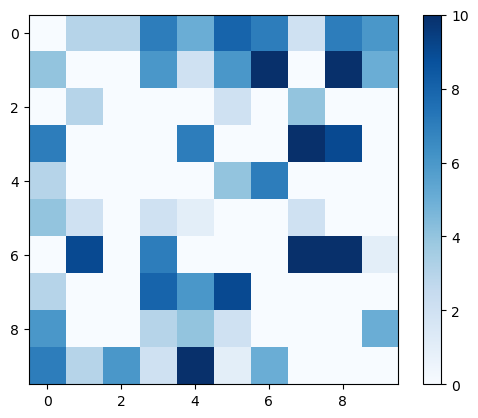

In [4]:
plt.imshow(adjacency_matrix,cmap='Blues')
plt.colorbar()

In [5]:
# list all the edges of the node 1
print("Edges of node 1:")
for edge in G.edges(1, data=True):
    print(edge)

Edges of node 1:
(1, 0, {'weight': 4.0})
(1, 3, {'weight': 6.0})
(1, 4, {'weight': 2.0})
(1, 5, {'weight': 6.0})
(1, 6, {'weight': 10.0})
(1, 8, {'weight': 10.0})
(1, 9, {'weight': 5.0})


{(0, 1): Text(0.7742608520389846, 0.032350170012196894, '3.0'),
 (0, 2): Text(0.7297182078469803, 0.3083385871244472, '3.0'),
 (0, 3): Text(0.06599568800657213, 0.09221340396765501, '7.0'),
 (0, 4): Text(0.5332554839031992, 0.017467280304687777, '5.0'),
 (0, 5): Text(0.44199380248617587, -0.09572115472932638, '8.0'),
 (0, 6): Text(0.13989400073527308, -0.19675695529666506, '7.0'),
 (0, 7): Text(0.7457340519932006, -0.39965398126008717, '2.0'),
 (0, 8): Text(0.2878830807216949, -0.47190106972241785, '7.0'),
 (0, 9): Text(0.2812648322679192, -0.10981836605394427, '6.0'),
 (1, 0): Text(0.7742608520389846, 0.032350170012196894, '4.0'),
 (1, 3): Text(-0.15974345995444317, 0.3304340953932154, '6.0'),
 (1, 4): Text(0.30751633594218386, 0.25568797173024815, '2.0'),
 (1, 5): Text(0.21625465452516054, 0.142499536696234, '6.0'),
 (1, 6): Text(-0.08584514722574221, 0.04146373612889531, '10.0'),
 (1, 8): Text(0.06214393276067956, -0.23368037829685748, '10.0'),
 (1, 9): Text(0.05552568430690394, 0.1

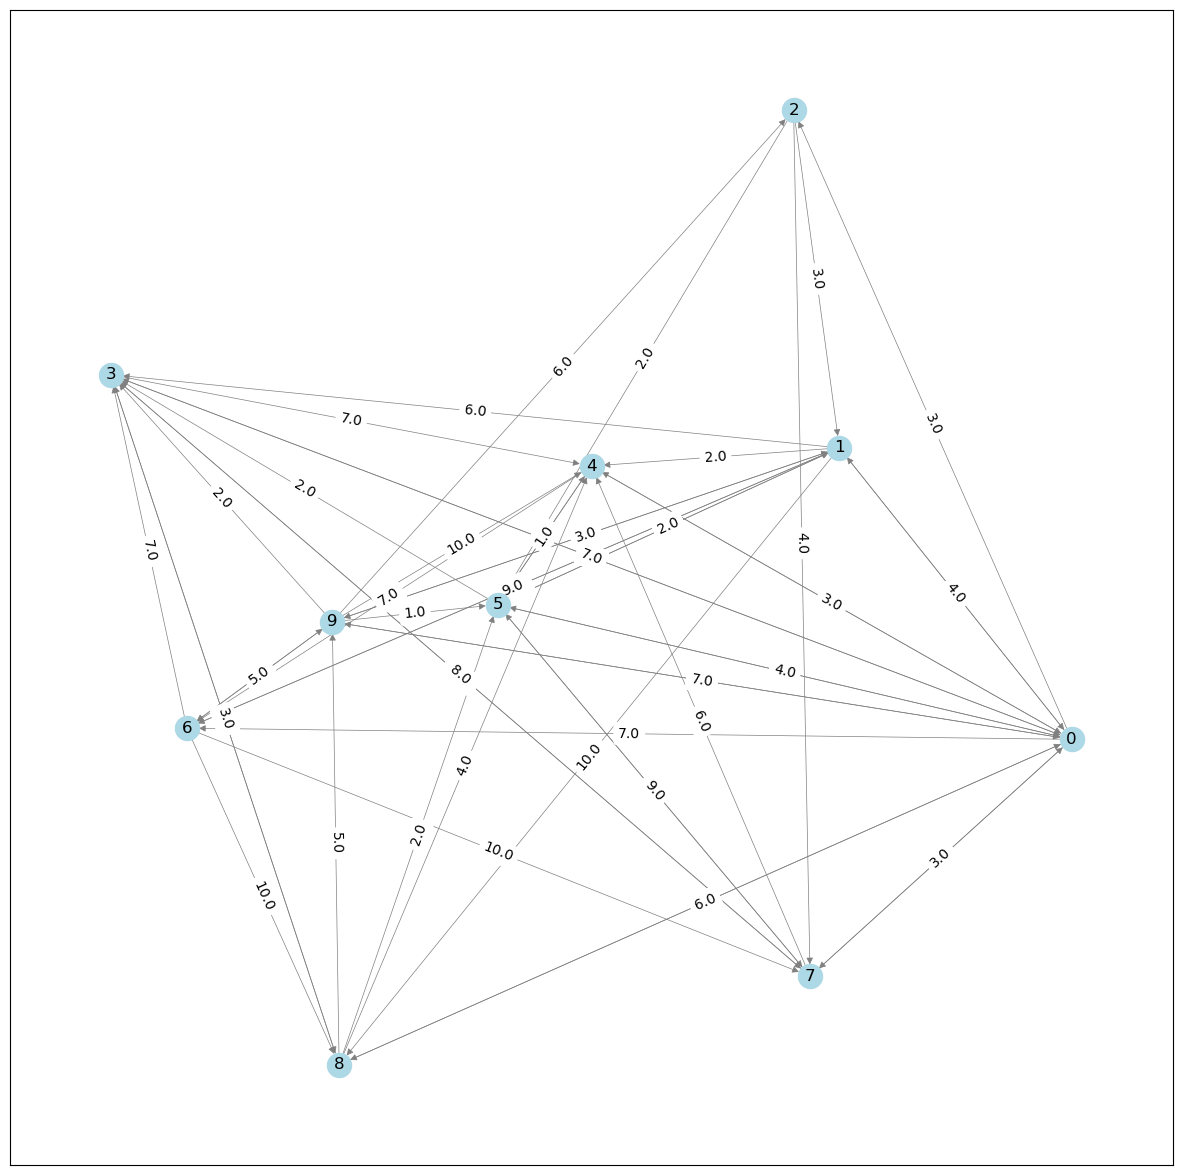

In [6]:
pos = nx.kamada_kawai_layout(G)
# set figure size
plt.figure(figsize=(15,15))
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=0.5, alpha=1)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [7]:
def floyd_warshall(graph):
    num_nodes = len(graph.nodes)
    dist = [[float("inf")] * num_nodes for _ in range(num_nodes)]
    next_node = [[0] * num_nodes for _ in range(num_nodes)]
    
    # Initialize distance and next_node matrices
    for edge in graph.edges(data=True):
        u, v, weight = edge
        dist[u][v] = weight["weight"]
        next_node[u][v] = v
    for i in range(num_nodes):
        dist[i][i] = 0

    # Floyd-Warshall
    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
                    next_node[i][j] = next_node[i][k]

    # Build path reconstruction function
    def reconstruct_path(start, end):
        if next_node[start][end] == 0:
            return []

        path = [start]
        while start != end:
            start = next_node[start][end]
            path.append(start)

        return path

    return dist, reconstruct_path


# Testing with the previous graph
distances, get_path = floyd_warshall(G)

# Example: shortest path from node 0 to node 4
print("Shortest path from node 0 to node 4: ", get_path(0, 4))

# Example: shortest path from node 3 to node 1
print("Shortest path from node 3 to node 1: ", get_path(6, 4))


Shortest path from node 0 to node 4:  [0, 4]
Shortest path from node 3 to node 1:  [6, 9, 5, 4]


In [41]:
print("Shortest path from node 6 to node 4: ", get_path(6, 4))

Shortest path from node 6 to node 4:  [6, 9, 5, 4]


## MC-TD

In [11]:
import numpy as np

def mc_policy_evaluation(graph, episodes, start_node, end_node, gamma=1):
    Q = {}
    returns = {}

    for edge in graph.edges():
        Q[edge] = 0
        returns[edge] = []

    for episode in range(episodes):
        state = start_node
        trajectory = []
        while state != end_node:
            actions = list(graph[state])
            if not actions:  # If there are no actions, break out of the loop
                break
            action = np.random.choice(actions)
            reward = -graph[state][action]['weight']
            trajectory.append((state, action, reward))
            state = action

        G = 0
        for t in reversed(range(len(trajectory))):
            state, action, reward = trajectory[t]
            G = gamma * G + reward
            if not (state, action) in [(x[0], x[1]) for x in trajectory[0:t]]:
                returns[(state, action)].append(G)
                Q[(state, action)] = np.mean(returns[(state, action)])

    policy = {}
    for state in graph.nodes():
        actions = list(graph[state])
        if actions:
            q_values = [Q[(state, action)] for action in actions]
            best_action = actions[np.argmax(q_values)]
            policy[state] = best_action

    return policy


# Use the function
policy = mc_policy_evaluation(G, 1000, 0, 4)

print("Optimal Policy:")
for node in policy:
    print(f"From node {node}, go to node {policy[node]}")


Optimal Policy:
From node 0, go to node 4
From node 1, go to node 4
From node 2, go to node 5
From node 3, go to node 4
From node 4, go to node 0
From node 5, go to node 4
From node 6, go to node 9
From node 7, go to node 4
From node 8, go to node 4
From node 9, go to node 4


# SARSA 0

In [47]:
class RLAgent:
    def __init__(self, graph, num_nodes, alpha=0.5, gamma=0.95, epsilon=0.1):
        self.graph = graph
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((num_nodes, num_nodes))  # Q-values initialization
        self.e_values = np.zeros((num_nodes, num_nodes))  # E-values initialization

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.q_values[state, action] for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            action = np.random.choice(neighbors)
        else:
            # Choose the action with highest Q-value from the neighbors
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        # SARSA(0) update
        target = reward + self.gamma * self.q_values[next_state, next_action]
        self.q_values[state, action] += self.alpha * (target - self.q_values[state, action])

    # def learn(self, start_node, end_node, num_episodes):
    #     for i in range(num_episodes):
    #         # print(f"Episode {i}")
    #         state = start_node
    #         action = self.choose_action(state)
    #         while state != end_node:
    #             reward = -self.graph.edges[state, action]['weight']
    #             next_state = action
    #             next_action = self.choose_action(next_state)
    #             self.update(state, action, reward, next_state, next_action)
    #             state = next_state
    #             action = next_action

    def learn(self, num_episodes):
        for start_node in range(self.num_nodes):
            for end_node in range(self.num_nodes):
                if start_node == end_node:
                    continue
                for _ in range(num_episodes):
                    state = start_node
                    action = self.choose_action(state)
                    while state != end_node:
                        reward = -self.graph.edges[state, action]['weight']
                        next_state = action
                        next_action = self.choose_action(next_state)
                        self.update(state, action, reward, next_state, next_action)
                        state = next_state
                        action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            q_values = [self.q_values[state, action] for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            state = action
            path.append(state)
        return path

# Initialize the RLAgent
agent = RLAgent(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=10000)
agent.learn(num_episodes=200)




In [46]:
# Get the optimal path
path = agent.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

Optimal path from node 6 to node 4:  [6, 9, 5, 4]


## SARSA LAMBDA

In [49]:
class RLAgent_lambda:
    def __init__(self, graph, num_nodes, alpha=0.5, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.q_values = np.zeros((num_nodes, num_nodes))  # Q-values initialization
        self.e_values = np.zeros((num_nodes, num_nodes))  # Eligibility traces initialization

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.q_values[state, action] for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            action = np.random.choice(neighbors)
        else:
            # Choose the action with highest Q-value from the neighbors
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        # SARSA(lambda) update
        delta = reward + self.gamma * self.q_values[next_state, next_action] - self.q_values[state, action]
        self.e_values[state, action] += 1
        self.q_values += self.alpha * delta * self.e_values
        self.e_values *= self.gamma * self.lambda_

    def learn(self, start_node, end_node, num_episodes):
        for _ in range(num_episodes):
            state = start_node
            action = self.choose_action(state)
            self.e_values.fill(0)  # Reset the eligibility traces
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            q_values = [self.q_values[state, action] for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            state = action
            path.append(state)
        return path


In [53]:
# Initialize the RLAgent
agent_lambda = RLAgent_lambda(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=10000)
agent_lambda.learn(start_node=6, end_node=4, num_episodes=1000)

path = agent_lambda.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

Optimal path from node 6 to node 4:  [6, 9, 5, 4]


## Value Func appox

In [54]:
class RLAgent_vfa:
    def __init__(self, graph, num_nodes, alpha=0.5, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.w = np.zeros(num_nodes * num_nodes)  # Weight vector for function approximation
        self.e_values = np.zeros(num_nodes * num_nodes)  # Eligibility traces initialization

    def get_features(self, state, action):
        features = np.zeros(self.num_nodes * self.num_nodes)
        features[state*self.num_nodes + action] = 1
        return features

    def get_q_value(self, state, action):
        features = self.get_features(state, action)
        return np.dot(self.w, features)

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.get_q_value(state, action) for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            # Choose a random action from the neighbors
            action = np.random.choice(neighbors)
        else:
            # Choose the action with highest Q-value from the neighbors
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        # SARSA(λ) update with function approximation
        delta = reward + self.gamma * self.get_q_value(next_state, next_action) - self.get_q_value(state, action)
        features = self.get_features(state, action)
        self.e_values += features
        self.w += self.alpha * delta * self.e_values
        self.e_values *= self.gamma * self.lambda_

    def learn(self, start_node, end_node, num_episodes):
        for _ in range(num_episodes):
            state = start_node
            action = self.choose_action(state)
            self.e_values.fill(0)  # Reset the eligibility traces
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            q_values = [self.get_q_value(state, action) for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            state = action
            path.append(state)
        return path


In [55]:
# Initialize the RLAgent
agent_vfa = RLAgent_vfa(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=10000)
agent_vfa.learn(start_node=6, end_node=4, num_episodes=1000)

path = agent_vfa.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

Optimal path from node 6 to node 4:  [6, 9, 5, 4]


## VFA torch

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

class QNet(nn.Module):
    def __init__(self, num_nodes):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(num_nodes*2, 64)  # Assume the input is a one-hot encoded state-action pair
        self.fc2 = nn.Linear(64, 1)  # The output is a single Q-value

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class RLAgent_vfa_torch:
    def __init__(self, graph, num_nodes, alpha=0.01, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.net = QNet(num_nodes)
        self.optimizer = optim.Adam(self.net.parameters(), lr=alpha)
        self.e_values = np.zeros((num_nodes, num_nodes))

    def get_features(self, state, action):
        features = np.zeros(self.num_nodes * 2)
        features[state] = 1
        features[self.num_nodes + action] = 1
        return torch.FloatTensor(features)

    def get_q_value(self, state, action):
        features = self.get_features(state, action)
        return self.net(features)

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.get_q_value(state, action).item() for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(neighbors)
        else:
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        q_value = self.get_q_value(state, action)
        next_q_value = self.get_q_value(next_state, next_action)
        target = reward + self.gamma * next_q_value

        self.optimizer.zero_grad()
        loss = nn.MSELoss()(q_value, target.detach())
        loss.backward()
        self.optimizer.step()

    def learn(self, start_node, end_node, num_episodes):
        for _ in range(num_episodes):
            state = start_node
            action = self.choose_action(state)
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            q_values = [self.get_q_value(state, action).item() for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            state = action
            path.append(state)
        return path


In [58]:
# Initialize the RLAgent
agent_vfa_torch = RLAgent_vfa_torch(G, num_nodes)

# Learn from the environment
# agent.learn(start_node=6, end_node=4, num_episodes=10000)
agent_vfa_torch.learn(start_node=6, end_node=4, num_episodes=1000)

path = agent_vfa_torch.get_optimal_path(start_node=6, end_node=4)
print("Optimal path from node 6 to node 4: ", path)

Optimal path from node 6 to node 4:  [6, 9, 5, 4]


### with gpu

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class QNet(nn.Module):
    def __init__(self, num_nodes):
        super(QNet, self).__init__()
        self.fc1 = nn.Linear(num_nodes*2, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class RLAgent_vfa_torch:
    def __init__(self, graph, num_nodes, alpha=0.01, gamma=0.95, epsilon=0.1, lambda_=0.9):
        self.graph = graph
        self.num_nodes = num_nodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_ = lambda_
        self.net = QNet(num_nodes).to(device)
        self.optimizer = optim.Adam(self.net.parameters(), lr=alpha)

    def get_features(self, state, action):
        features = np.zeros(self.num_nodes * 2)
        features[state] = 1
        features[self.num_nodes + action] = 1
        return torch.FloatTensor(features).to(device)

    def get_q_value(self, state, action):
        features = self.get_features(state, action)
        return self.net(features)

    def choose_action(self, state):
        neighbors = list(self.graph.neighbors(state))
        q_values = [self.get_q_value(state, action).item() for action in neighbors]
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(neighbors)
        else:
            action = neighbors[np.argmax(q_values)]
        return action

    def update(self, state, action, reward, next_state, next_action):
        q_value = self.get_q_value(state, action)
        next_q_value = self.get_q_value(next_state, next_action)
        target = reward + self.gamma * next_q_value

        self.optimizer.zero_grad()
        loss = nn.MSELoss()(q_value, target.detach())
        loss.backward()
        self.optimizer.step()

    def learn(self, start_node, end_node, num_episodes):
        for _ in range(num_episodes):
            state = start_node
            action = self.choose_action(state)
            while state != end_node:
                reward = -self.graph.edges[state, action]['weight']
                next_state = action
                next_action = self.choose_action(next_state)
                self.update(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action

    def get_optimal_path(self, start_node, end_node):
        path = [start_node]
        state = start_node
        while state != end_node:
            neighbors = list(self.graph.neighbors(state))
            q_values = [self.get_q_value(state, action).item() for action in neighbors]
            action = neighbors[np.argmax(q_values)]
            state = action
            path.append(state)
        return path

num_nodes = 20
num_episodes = 1000

agent = RLAgent_vfa_torch(G, num_nodes)

agent.learn(start_node=6, end_node=4, num_episodes=num_episodes)

path = agent.get_optimal_path(start_node=6, end_node=4)
print(path)


[6, 9, 5, 4]
